# Bayseian Binary 
This is a test noteook for running emcee with the Baysian method

First part is cleaning up the data. Getting rid of low SNR points, adding isochron fitting and stuff like that

In [146]:
%run BinaryDataClean3.py

# Inputs are paths to the fits files I'm using. First one is the allaverage file, second is the allvisit type
# file. 3rd is the isochrone files. 
Tables = BinaryDataClean3('/home/cody/Binary Search/2nd_Data_Set/mc_rgb_nocuts.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')
AllAvg, AllVis, ISO = Tables.get_data() # Set up the tables
AllVis = Tables.cuts(AllVis)  # Cut low SNR values and velocities that are too alrge
AllAvg = Tables.nvisits_cut(AllAvg,5) # Only want stars with at least 5 visits
AAS_RG = Tables.rg_cut(AllAvg) # Double check that I'm working with Red giant stars

AAS_RG_I = Tables.iso_fit(AAS_RG,ISO) # Perform the isochrone fitting. This is where the print statements are coming from

AAS_RV_I = Tables.rv_table_add(AAS_RG_I, AllVis) # Tack on the radial velocity values, error, and observation date
                                                # This is so everything i need is in one table. Three columns
                                                # are string for saving purposes

AllAvg_LMC_I = Tables.mc_cut(AAS_RV_I, 'L') # Cut it up into one table for the LMC and one for the SMC
AllAvg_SMC_I = Tables.mc_cut(AAS_RV_I, 'S')

AllAvg_SMC=Tables.Table_Convert(AllAvg_SMC_I) # Turn the strings made in rv_table_add into lists
AllAvg_LMC=Tables.Table_Convert(AllAvg_LMC_I)


Done with 0.000000
No good fits in 3 sigma of erros. Star 2M05140287-7214484, row 16
No good fits in 3 sigma of erros. Star 2M05205391-7259483, row 87
No good fits in 3 sigma of erros. Star 2M05214222-7227340, row 98
Done with 100.000000
No good fits in 3 sigma of erros. Star 2M05215411-7316058, row 103
No good fits in 3 sigma of erros. Star 2M05235220-7216056, row 124
Done with 200.000000
No good fits in 3 sigma of erros. Star 2M04570693-7129288, row 250
No good fits in 3 sigma of erros. Star 2M05010386-7102238, row 300
No good fits in 3 sigma of erros. Star 2M06261934-7011104, row 370
No good fits in 3 sigma of erros. Star 2M06281846-7008537, row 400
No good fits in 3 sigma of erros. Star 2M06320563-7050235, row 451
No good fits in 3 sigma of erros. Star 2M06354972-6957575, row 488
No good fits in 3 sigma of erros. Star 2M06390106-7040477, row 500
No good fits in 3 sigma of erros. Star 2M05185026-7556305, row 510
No good fits in 3 sigma of erros. Star 2M05221955-7617219, row 529
No g

Next cell is a little hacky, it's doing through everything again and making sure I only have stars with at least 5 observations. When I cut out low SNR observations, the nvisits_cut, doens't hit all of the stars it should hit.

In [147]:
rr = []
for N in range(len(AllAvg_LMC)):
    if len(AllAvg_LMC['RADIALV'][N]) <= 5:
        rr.append(N)
AllAvg_LMC.remove_rows(rr)

rr = []
for N in range(len(AllAvg_SMC)):
    if len(AllAvg_SMC['RADIALV'][N]) <= 5:
        rr.append(N)
AllAvg_SMC.remove_rows(rr)

Next 3 cells you can probably ignore. It's my first stab at this, so it has some problems but I don't want to delete it incase I need it later

In [148]:
%run BinaryBays.py

In [149]:
BB = BinaryBays(AllAvg_LMC)

In [150]:
a = 0.1
b = 0.61
bf = [0.4]
bob = BB.Binary_Fraction(100, ['L',3.2,2.5], bf = bf , loops = 10,
                         jitter = True, a = a, b = b, bins = np.arange(0,11,1))
print(bob)

Starting 0.4
Starting synthetic run 0.4
Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with loop 5
Starting loop 6
Done with loop 6
Starting loop 7
Done with loop 7
Starting loop 8
Done with loop 8
Starting loop 9
Done with loop 9
Done with 0.4
Done with fraction 0.4
{0.4: array([1.36489329e-99])}


This uses the log likelihood, should be bug free? Set up to work well with $\textit{emcee}$. 

In [151]:
%run BinaryBays2.py

In [152]:
BB2 = BinaryBays2(AllAvg_LMC)

In [154]:
a = 0.1
b = 0.61
bob2 = BB2.lnlike(100, ['L',3.2,2.5], bf = 0.2 , loops = 10,
                         jitter = True, a = a, b = b, bins = np.arange(0,11,1))

This is all taken from the $\textit{emcee}$, page, but modified for what I need. Right now there are just 3 paramiters. In theory I could have more, but to make sure things are working I thought I would keep it simple for now.

In [138]:
ndim, nwalkers = 3, 10
pos = [np.array([0.5, 0.1, 0.61]) + 1e-3*np.random.randn(ndim) for i in range(nwalkers)]

In [139]:
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, BB2.lnprob, args = (100, ['L',3.2,2.5],
                                                                    10, True, np.arange(0,11,1)))

In [141]:
%time sampler.run_mcmc(pos, 10)

Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with loop 5
Starting loop 6
Done with loop 6
Starting loop 7
Done with loop 7
Starting loop 8
Done with loop 8
Starting loop 9
Done with loop 9
Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with loop 5
Starting loop 6
Done with loop 6
Starting loop 7
Done with loop 7
Starting loop 8
Done with loop 8
Starting loop 9
Done with loop 9
Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with loop 5
Starting loop 6
Done with loop 6
Starting loop 7
Done with loop 7
Starting loop 8
Done with loop 8
Starting loop 9
Done with loop 9
Starting l

Done with loop 8
Starting loop 9
Done with loop 9
Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with loop 5
Starting loop 6
Done with loop 6
Starting loop 7
Done with loop 7
Starting loop 8
Done with loop 8
Starting loop 9
Done with loop 9
Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with loop 5
Starting loop 6
Done with loop 6
Starting loop 7
Done with loop 7
Starting loop 8
Done with loop 8
Starting loop 9
Done with loop 9
Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with loop 5
Starting loop 6
Done with loop 6
Starting loop 7
Done with loop 7
Starting loop 8
Done with 

Done with loop 7
Starting loop 8
Done with loop 8
Starting loop 9
Done with loop 9
Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with loop 5
Starting loop 6
Done with loop 6
Starting loop 7
Done with loop 7
Starting loop 8
Done with loop 8
Starting loop 9
Done with loop 9
Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with loop 5
Starting loop 6
Done with loop 6
Starting loop 7
Done with loop 7
Starting loop 8
Done with loop 8
Starting loop 9
Done with loop 9
Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with loop 5
Starting loop 6
Done with loop 6
Starting loop 7
Done with 

Done with loop 6
Starting loop 7
Done with loop 7
Starting loop 8
Done with loop 8
Starting loop 9
Done with loop 9
Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with loop 5
Starting loop 6
Done with loop 6
Starting loop 7
Done with loop 7
Starting loop 8
Done with loop 8
Starting loop 9
Done with loop 9
Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with loop 5
Starting loop 6
Done with loop 6
Starting loop 7
Done with loop 7
Starting loop 8
Done with loop 8
Starting loop 9
Done with loop 9
Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with loop 5
Starting loop 6
Done with 

Done with loop 5
Starting loop 6
Done with loop 6
Starting loop 7
Done with loop 7
Starting loop 8
Done with loop 8
Starting loop 9
Done with loop 9
Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with loop 5
Starting loop 6
Done with loop 6
Starting loop 7
Done with loop 7
Starting loop 8
Done with loop 8
Starting loop 9
Done with loop 9
Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with loop 5
Starting loop 6
Done with loop 6
Starting loop 7
Done with loop 7
Starting loop 8
Done with loop 8
Starting loop 9
Done with loop 9
Starting loop 0
Done with loop 0
Starting loop 1
Done with loop 1
Starting loop 2
Done with loop 2
Starting loop 3
Done with loop 3
Starting loop 4
Done with loop 4
Starting loop 5
Done with 

(array([[0.50430044, 0.09615672, 0.61242249],
        [0.50008582, 0.09798569, 0.60889917],
        [0.50123804, 0.10124985, 0.60909021],
        [0.49806424, 0.09960418, 0.60832514],
        [0.5009223 , 0.10126759, 0.6100653 ],
        [0.50227621, 0.10146042, 0.61013058],
        [0.48892598, 0.11285054, 0.6079703 ],
        [0.5004123 , 0.09896966, 0.60719635],
        [0.50204103, 0.10112999, 0.61053076],
        [0.49979912, 0.10127441, 0.61087535]]),
 array([-179.89148527, -175.78607864, -167.19538309, -203.99758838,
        -165.33859153, -202.79826628, -190.10612104, -163.09594693,
        -162.01455195, -180.45667494]),
 ('MT19937', array([3134843199,  464833638, 3733700624, 3718074220,  641802197,
         1493132286, 3921733678,  655385650, 1328933131, 2583513513,
         2455100297,  415260186, 3748907424,  555649481, 3600051450,
         1108960882, 4136428135, 3433165327, 1834867456,  493041531,
         1837972899, 3908779246, 1793900690, 2991755856, 2023620281,
      

In [142]:
samples = sampler.chain[:].reshape((-1,ndim))

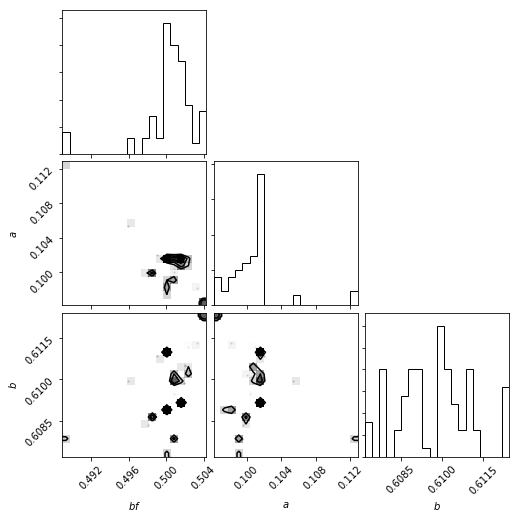

In [145]:
import corner
fig = corner.corner(samples, labels=["$bf$", "$a$", "$b$"],
                    )
fig.savefig("BF test.png")